<a href="https://colab.research.google.com/github/joaomheusi/RedesNeurais/blob/master/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://storage.googleapis.com/kaggle-datasets-images/128/270/d149695d1f9a97ec54cf673be6430ad7/dataset-cover.jpg">
    <h1><center>Avaliação de preços de casa em King Country, USA</center></h1>
    <strong><center>Inteligência Artificial</center></strong>
    <strong><center>João Marcelo H. Heusi, Luiz Sergio da Silva, Natasha Caroline</center></strong>


## Dataset

Os dados utilizados vieram de um dataset do Kaggle:
https://www.kaggle.com/harlfoxem/housesalesprediction

#### Lista de atributos:
    
* id - ID unico para o registro
* date - Data da venda da casa
* price - Preço da venda
* bedrooms - Número de quartos
* bathrooms - Número de banheiros na casa, 0.5 representa a presença de um banheiro sem chuveiro
* sqft_living - Pé quadrado de área privativa construída.
* sqft_lot - Pé quadrado de área total.
* floors - Número de andares
* waterfront - Váriavel binária dizendo se a casa possui vista para o mar 
* view - Indice de 0 à 4 representando quão boa a vista da casa é
* condition - Indice de 1 à 5 representando o quão boa era a condição da casa
* grade - Indice de 0 à 13, levando em consideração o material utilizado na construção da casa e o seu design.
* sqft_above - Pé quadrado que está acima do nível do solo.
* sqft_basement - Pé quadrado do porão.
* yr_built - Ano em que a casa foi construída.
* yr_renovated - Ano em que a casa foi renovada.
* zipcode - Código postal da casa
* lat - Latitude
* long - Longitude
* sqft_living15 - Pé quadrado de área privativa dos 15 vizinhos mais próximos.
* sqft_lot15 - Pé quadrado do tamanho do terreno dos 15 vizinhos mais próximos.

In [0]:
from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

url = 'https://raw.githubusercontent.com/joaomheusi/RedesNeurais/master/kc_house_data.csv'
df = pd.read_csv(url)

## Como o dataset se parece:

In [24]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Explorar e limpar o dataset
#### Foi observado que a existiam muitos outliers e atributos que não iriam agregar ao aprendizado da rede neural

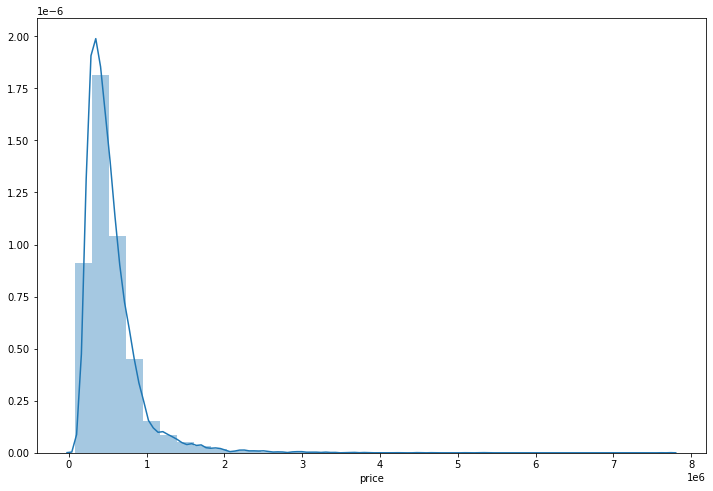

In [25]:
plt.figure(figsize = (12,8))
sns.distplot(df['price'],bins= 35);

## Removidos valores acima de 3mi ( Outliers)
### 0,2% dos dados removidos

In [26]:
print('Quantidade de casas com valor acima de 3mi: {}'.format(df[df['price']>3000000].shape[0]))
print('Quantidade total de dados no dataset: {}'.format(df.shape[0]))
df = df[df['price'] <3000000]

Quantidade de casas com valor acima de 3mi: 45
Quantidade total de dados no dataset: 21597


## Tornando o atributo data em algo utilizável.

In [0]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

## Excluindo valores que não agregam à análise

In [0]:
df = df.drop('id',axis =1)
df = df.drop('date', axis =1)
df = df.drop('zipcode', axis = 1)

# Separando os dados em Dados de Treino e Teste
### 30% dos dados para teste e 70% para treino



In [0]:
X = df.drop('price',axis=1).values
y = df['price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Escalar os dados para tornar a simulação mais simples

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Criando o modelo de rede neural

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer ='adam', loss='mse', metrics =['accuracy'])

# Treinando o modelo

In [32]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
118/118 [==============================] - 0s 4ms/step - loss: 393657647104.0000 - accuracy: 0.0000e+00 - val_loss: 384441057280.0000 - val_accuracy: 0.0000e+00
Epoch 2/400
118/118 [==============================] - 0s 3ms/step - loss: 393248178176.0000 - accuracy: 0.0000e+00 - val_loss: 382996316160.0000 - val_accuracy: 0.0000e+00
Epoch 3/400
118/118 [==============================] - 0s 3ms/step - loss: 386679504896.0000 - accuracy: 0.0000e+00 - val_loss: 366761377792.0000 - val_accuracy: 0.0000e+00
Epoch 4/400
118/118 [==============================] - 0s 3ms/step - loss: 345997508608.0000 - accuracy: 0.0000e+00 - val_loss: 293155274752.0000 - val_accuracy: 0.0000e+00
Epoch 5/400
118/118 [==============================] - 0s 3ms/step - loss: 232456126464.0000 - accuracy: 0.0000e+00 - val_loss: 150767386624.0000 - val_accuracy: 0.0000e+00
Epoch 6/400
118/118 [==============================] - 0s 3ms/step - loss: 108624830464.0000 - accuracy: 0.0000e+00 - val_loss: 7508028

# Avaliando os resultados obtidos com o treino

In [0]:
losses = pd.DataFrame(model.history.history)

## Verificar se o modelo foi supertreinado 
Pelo comportamento obtido com o subset de Teste, a quantidade de treino realizada não impactou o modelo.
As linhas que representam o comportamente no segmento de teste está seguindo o mesmo movimento que a do comportamento nos dados de treino.


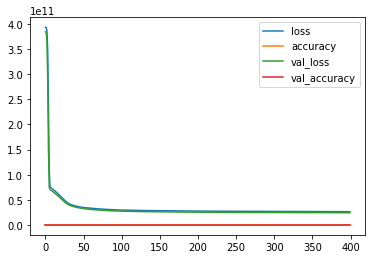

In [34]:
losses.plot();

In [35]:
#Verificar a métrica de erro médio absoluto
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

100736.42259050124

# Comparação do resultado obtido nos dados de teste com valores reais

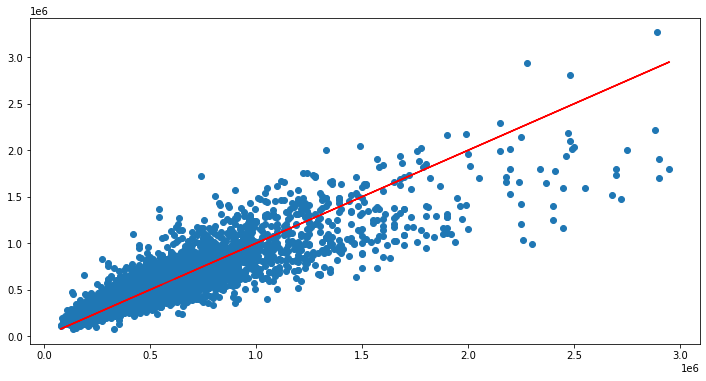

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r');

# Comparação do preço gerado pelo modelo utilizando um item do dataframe com os dados reais.

In [0]:
example_house = df.drop('price', axis =1).iloc[35]
example_house_price = df['price'].iloc[35]
example_house = example_house.values.reshape(-1,19)
example_house = scaler.transform(example_house)
a = model.predict(example_house)[0]
a = a[0]

In [38]:
print('Preço estimado pela rede neural: {}'.format(a))
print('Preço real da casa de exemplo: {}'.format(example_house_price))

Preço estimado pela rede neural: 744724.1875
Preço real da casa de exemplo: 696000.0
